# SyriaTel Communications Project: Customer Churn (Binary Classification)

### Table of Contents

1. Introduction + Cleaning + EDA: Exploration of the data without intensive technologies. 
2. Modeling the Data
3. Question One
4. Question Two
5. Question Three
6. Conclusion: The findings repeated in a concise summary.

### Strategic Approach

The stakeholder, SyriaTel, is a telecommunications company whose goal is to better understand what factors are causing customer churn. Due to limits on data size, the model will only be robust enough to be used by SyriaTel to analyze their specific data provided.

By exploring typical customer churn and using the CRISP-DM framework, I will seek to answer the following questions: 

1. What features of the dataset are primary determinants of customer churn and to what extent?

2. What are the ways that these findings can be interpreted and how can SyriaTel implement cost-effective solutions?

3. What is the customer charge per minute when each customer pays the average charge per customer? 

# Question Two

# What are the ways that these findings can be interpreted and how can SyriaTel implement cost-effective solutions?

The high number of minutes leading to customer churn may be an indication that customers could be upset when receiving a bill that is high due to a high number of minutes.

Additionally, high number of customer service calls is also leading to churn which could be a great place for SyriaTel to start in decyphering the problems leading their customers to churn. 

It is unclear in the data what the definition of customer service calls is. Is SyriaTel's customer service team repeatedly calling a customer about a late fee or is the customer calling to complain? More information would be helpful in uncovering the answers that we seek. 

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, mean_squared_error, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, scale
from sklearn.pipeline import Pipeline
from scipy.stats import randint
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, auc, confusion_matrix, classification_report, recall_score
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.datasets import make_blobs, make_moons
from sklearn.svm import SVC
from numpy import loadtxt
import shap
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.express as px
from dtreeviz.trees import *
from sklearn import tree
import networkx as nx
import pylab as plt
from networkx.drawing.nx_agraph import graphviz_layout



,account_length,area_code,intl_plan,vmail_plan,qty_vmails,sum_day_mins,sum_day_calls,total_day_charge,sum_eve_mins,sum_eve_calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0


# The Conversion of Minutes to Revenue

Each type of minute has a different charge. Seemingly due to the technological difficulty with each time of day. However, when used as a multiple there is a pretty large disparity between 4x and 17x or 27x.

- Day Minutes are roughly 17 cents per minute
- Evening Minutes are roughly 18 cents per minute
- Night Minutes are roughly 4 cents per minute
- International Minutes are roughly 27 cents per minute

### Total Number of Mins by Type

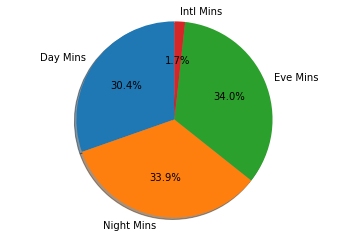

In [73]:
labels = 'Day Mins', 'Night Mins', 'Eve Mins', 'Intl Mins'
sizes = [599190, 669507, 669868, 34121]
explode = (0, 0, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Total Revenue by Minute Type

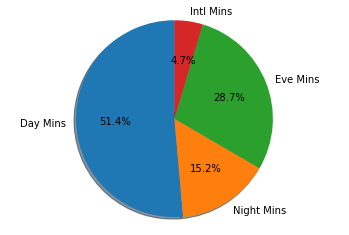

In [74]:

labels = 'Day Mins', 'Night Mins', 'Eve Mins', 'Intl Mins'
sizes = [101864, 30128, 56939, 9214]
explode = (0, 0, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Cost and Revenue

Future analysis with more data could determine the profit, costs, and determine if a better pricing model would reduce churn.

### Churn Numbers

The current percentage of churn is at 14.49% for one month. This means that each percentage point represents 33 customers that will churn in one month. To reduce churn to a reasonable about of around .58% per month, SyriaTel needs to retain 462 customers per month.

In [15]:
one_hot_df.churn.value_counts()

0.0    2850
1.0     483
Name: churn, dtype: int64

In [16]:
one_hot_df.churn.value_counts(normalize = True)

0.0    0.855086
1.0    0.144914
Name: churn, dtype: float64

# Solutions for SyriaTel

1. A Flat Monthly Fee: No more surprises for customers and no more stressful thoughts about a bill for them when they use their phone. This works better with natural human design as time can be perceived as short or long. 



2. Investigating Customer Service Calls: SyriaTel is receiving customer service calls before customers churn. They are likely capturing the reasons that customers are churning without resolving the problems. A possible solution may be recruiting competent people to resolve the problems in their customer service department. 
    

# Conclusion

The customers with an above average number of day minutes have been linked to being likely to churn. There are 293 of them. SyriaTel needs to reduce churn by 247 customers annually. By offering customers plans with flat monthly fees, SyriaTel will be able to reduce this churn and potentially save over $25,000.

# Future Work

This is one of many proposed solutions for decreasing churn that are easily accessible. Future work into understanding SyriaTel's contracts with customers would further assist in determining why customer retention is lacking. 